In this notebooks some graphs that were used for preprocessing have been collected together with an explanation.

Import for the notebook.

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from dataset.utility import get_frame_in_range
import dataset.dataset as ds
from dataset.dataset import values_of
from dataset.dataset import to_numpy

df = ds.read_imputed_onehot_dataset()
df_ni = ds.read_dataset()
df_bc = ds.read_dataset("best_for_customers.csv")

The following graph shows how each shop attracts customers in terms of mean and standard deviation. We can notice that Shopping Centers constitute outliers, in the sense that while most shop follow a significant increase in standard deviation with respect to their mean, Shopping Center are more "stable", having a contained standard deviation even with high mean.

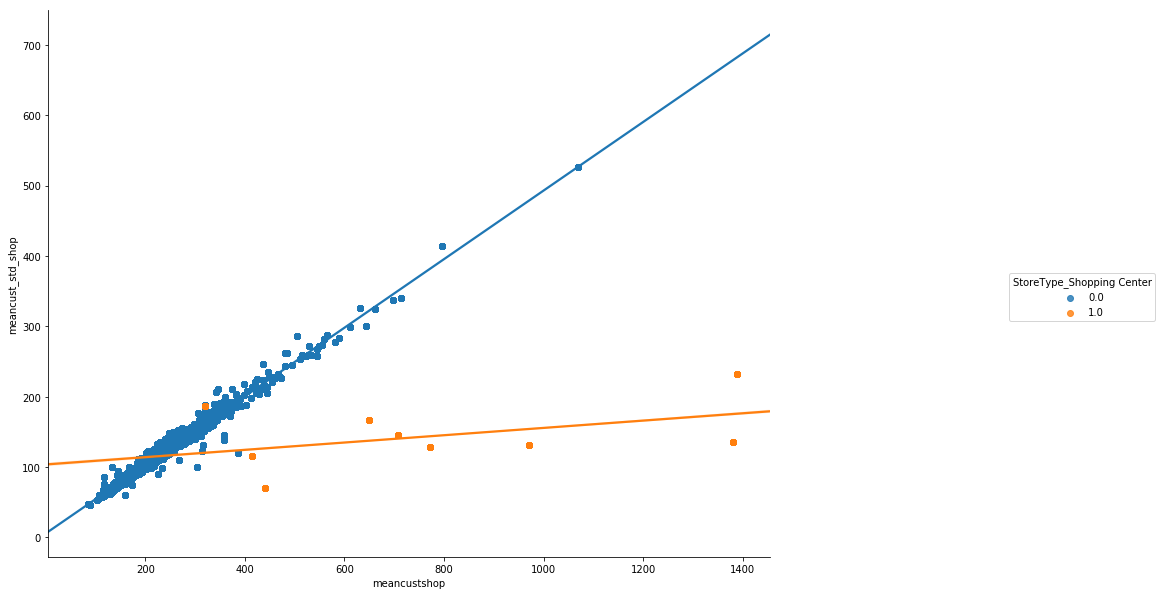

In [11]:
sb.lmplot(x="meancustshop", y="meancust_std_shop", data=df_bc, hue="StoreType_Shopping Center")
fig = plt.gcf()
fig.set_size_inches(18, 9)

The following graph shows how many customers each type of store attracts on average each month. We can again see that Shopping Centers attract more customers in general, even though they prove to have similar regularities as the other types.

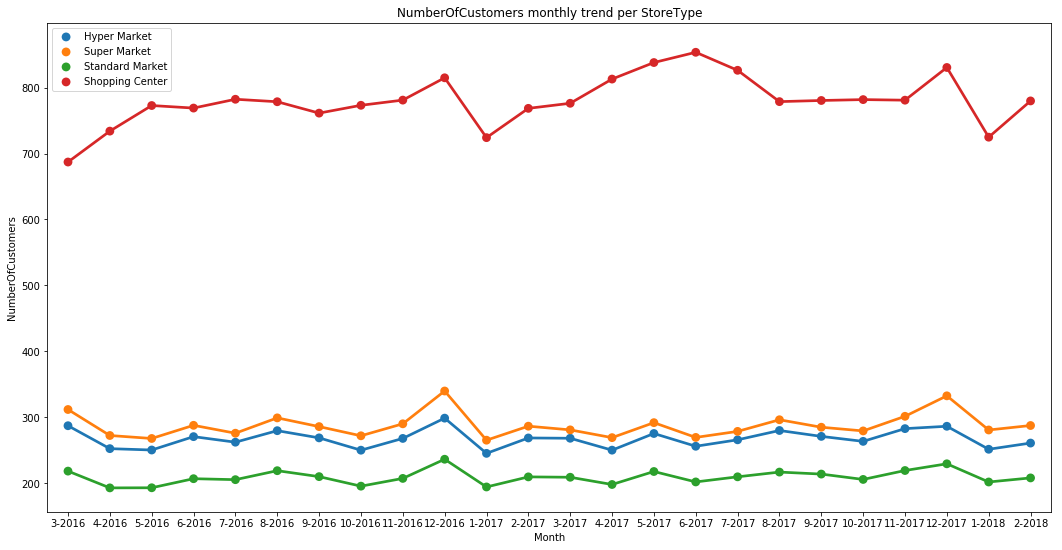

In [17]:
target = "NumberOfCustomers"
title = target + " monthly trend per StoreType"
bm = 3
by = 2016
em = 3
ey = 2018

month_x = []
sales_y_1 = []
sales_y_2 = []
sales_y_3 = []
sales_y_4 = []
while bm != em or by != ey:
    dfframe = get_frame_in_range(df, bm, by, bm, by)
    month_x.append(str(bm) + "-" + str(by))
    sales_y_1.append(dfframe[dfframe["StoreType_Hyper Market"] == 1][target].mean())
    sales_y_2.append(dfframe[dfframe["StoreType_Super Market"] == 1][target].mean())
    sales_y_3.append(dfframe[dfframe["StoreType_Standard Market"] == 1][target].mean())
    sales_y_4.append(dfframe[dfframe["StoreType_Shopping Center"] == 1][target].mean())
    bm += 1
    if bm == 13:
        bm = 1
        by += 1

pdf1 = pd.DataFrame(data={"Month": month_x, target: sales_y_1, "Type": "Hyper Market"})
pdf2 = pd.DataFrame(data={"Month": month_x, target: sales_y_2, "Type": "Super Market"})
pdf3 = pd.DataFrame(data={"Month": month_x, target: sales_y_3, "Type": "Standard Market"})
pdf4 = pd.DataFrame(data={"Month": month_x, target: sales_y_4, "Type": "Shopping Center"})
pdf = pd.concat([pdf1, pdf2, pdf3, pdf4])
sb.pointplot(x="Month", y=target, data=pdf, hue="Type").set_title(title)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18, 9)

The following graph shows how the distributions of customers is influenced by atmospherical events. As we can see, there is no major difference.

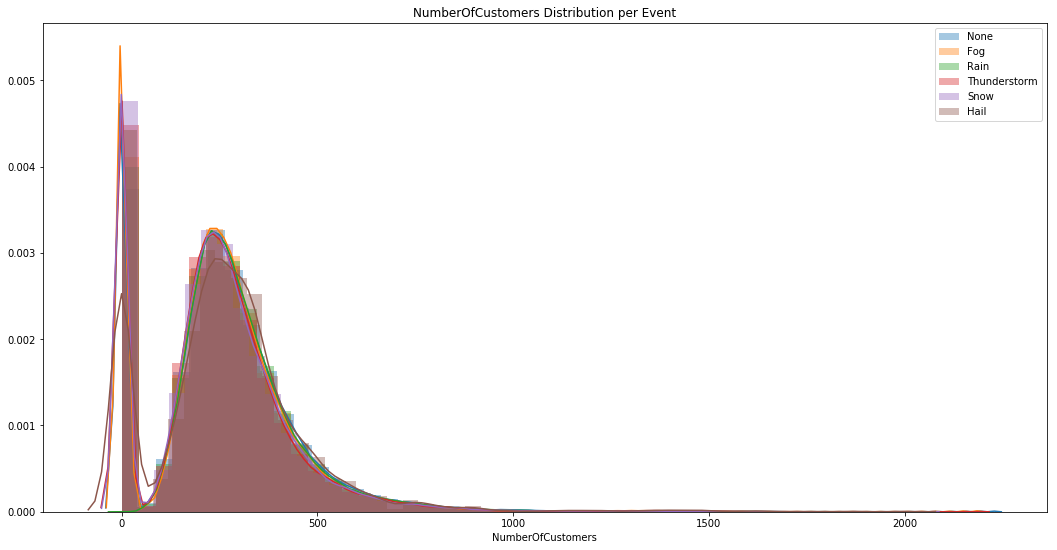

In [15]:
target = "NumberOfCustomers"
title = target + " Distribution per Event"
sb.distplot(a=df[df["Events_none"] == 1][target], label="None").set_title(title)
sb.distplot(a=df[df["Events_Fog"] == 1][target], label="Fog").set_title(title)
sb.distplot(a=df[df["Events_Rain"] == 1][target], label="Rain").set_title(title)
sb.distplot(a=df[df["Events_Thunderstorm"] == 1][target], label="Thunderstorm").set_title(title)
sb.distplot(a=df[df["Events_Snow"] == 1][target], label="Snow").set_title(title)
sb.distplot(a=df[df["Events_Hail"] == 1][target], label="Hail").set_title(title)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18, 9)

The following graph shows the relation between NumberofCustomers and NumberOfSales, with a distinction for each StoreType. As we can see, Standard Markets are the kind of store whose sales are the most sensitive to the number of customers. Shopping Centers, on the other hand, show a much lower increase in the trend.

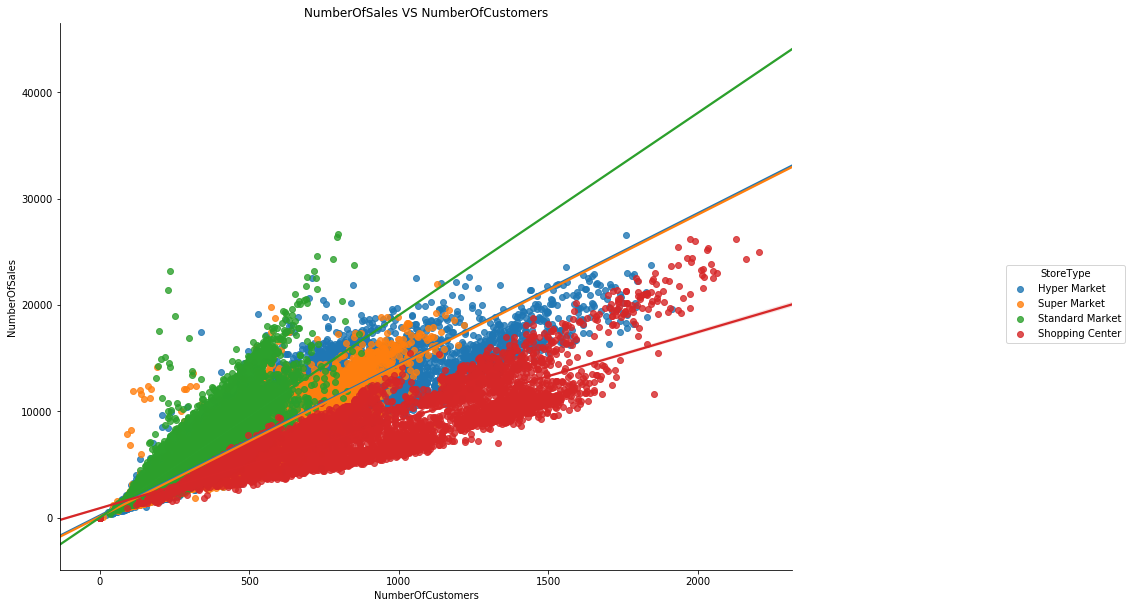

In [5]:
title = "NumberOfSales VS NumberOfCustomers"
sb.lmplot(x="NumberOfCustomers", y="NumberOfSales", data=df_ni, hue="StoreType")
ax = plt.gca()
ax.set_title(title)
fig = plt.gcf()
fig.set_size_inches(18, 9)

The following graph shows how the distance from the nearest competitor influences the NumberOfCustomers. There is appearently no significant change in the trend. 

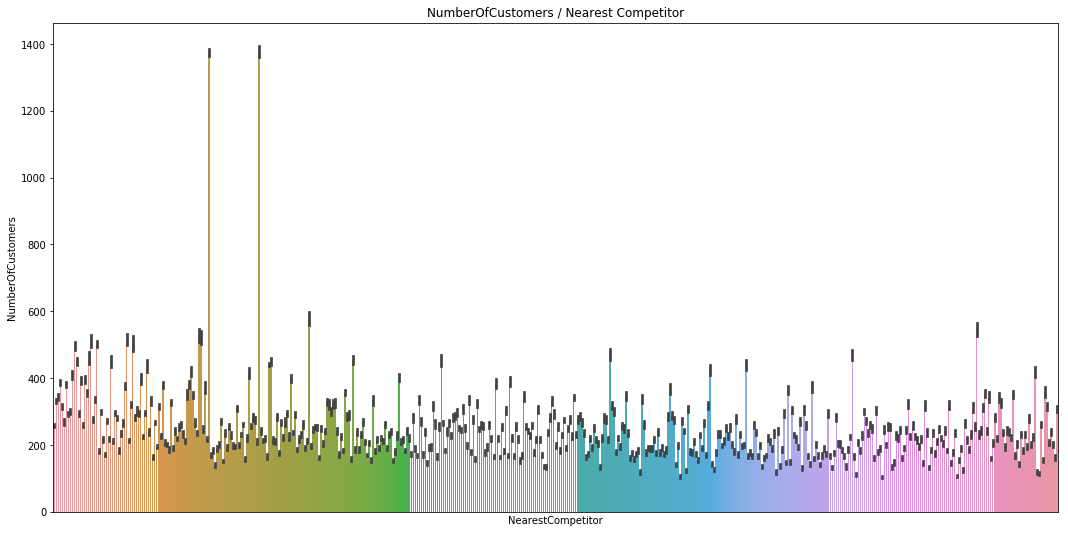

In [7]:
target = "NumberOfCustomers"
title = target + " / Nearest Competitor"
sb.barplot(x="NearestCompetitor", y=target, data=df).set_title(title)
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(18, 9)

The following graph shows the overall trend of the NumberOfCustomers over the observed period. We can notice that December 2016 was quite a profitable month compared to December 2017.

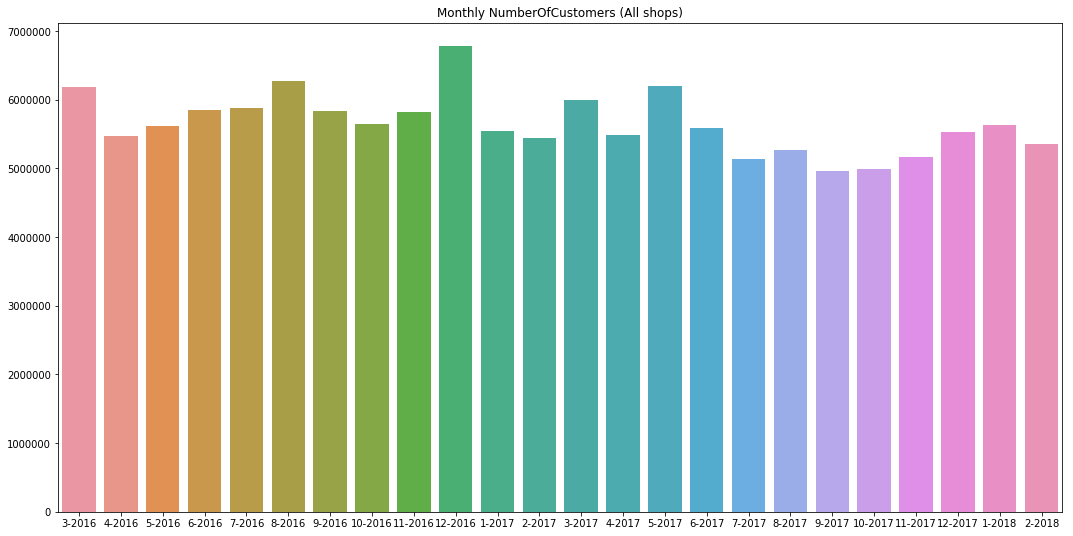

In [9]:
target = "NumberOfCustomers"
title = target + " monthly trend per StoreType"
bm = 3
by = 2016
em = 3
ey = 2018

month_x = []
sales_y = []
while bm != em or by != ey:
    dfframe = get_frame_in_range(df, bm, by, bm, by)
    month_x.append(str(bm) + "-" + str(by))
    sales_y.append(dfframe[target].sum())
    bm += 1
    if bm == 13:
        bm = 1
        by += 1

sb.barplot(x=month_x, y=sales_y).set_title("Monthly " + target + " (All shops)")
fig = plt.gcf()
fig.set_size_inches(18, 9)

The following graph shows the monthly NumberOfCustomers mean trend for each region. The most interesting fact we can notice is that the dataset is missing a portion of the data of the observed period. Specifically, from August 2017 to December 2017 (included) we have no data on the trend of the stores in region 3. We can also notice that region 4 and 5 are the most profitable. However, all regions still show an overall uniform trend, with only little exceptions.

C:\Users\Emilio\Documents\GitHub\Data-Mining-Project\dataset\utility.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  f["Date"] = pd.to_datetime(f["Date"], format="%d/%m/%Y")


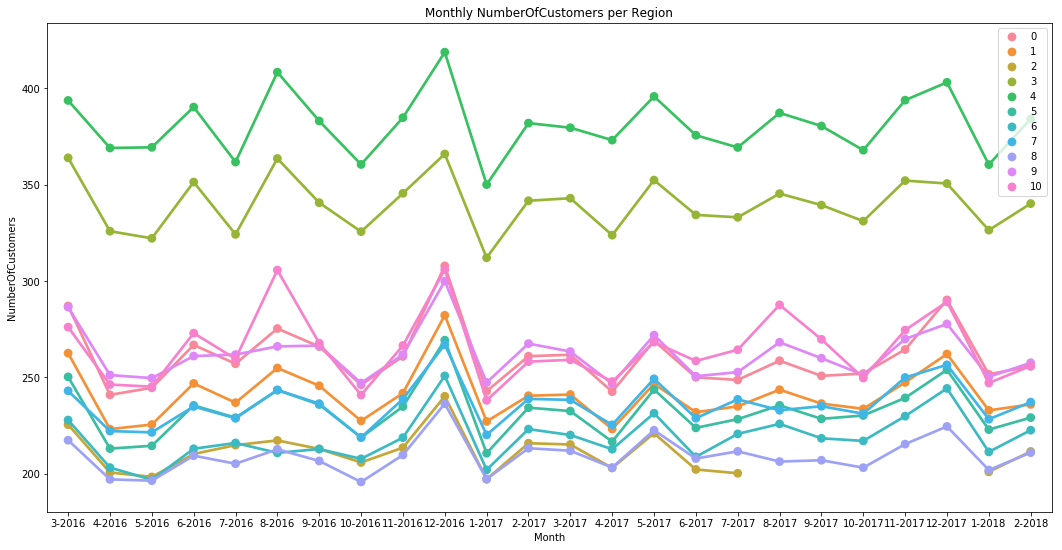

In [12]:
target = "NumberOfCustomers"
title = target + " monthly trend per StoreType"
regions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bm = 3
by = 2016
em = 3
ey = 2018
base_bm = bm
base_by = by
base_em = em
base_ey = ey

pdf = []
palette = sb.color_palette("hls", 11)
for i in regions:
    month_x = []
    sales_y = []
    while bm != em or by != ey:
        dfframe = get_frame_in_range(df[df["Region"] == i], bm, by, bm, by)
        month_x.append(str(bm) + "-" + str(by))
        sales_y.append(dfframe[target].mean())
        bm += 1
        if bm == 13:
            bm = 1
            by += 1
    pdf.append(pd.DataFrame(data={"Month":month_x, target:sales_y, "Region":i}))

    bm = base_bm
    by = base_by
    em = base_em
    ey = base_ey
pdf = pd.concat(pdf)
sb.pointplot(x="Month", y=target, data=pdf, hue="Region").set_title("Monthly " + target + " per Region")

plt.legend()
fig = plt.gcf()
fig.set_size_inches(18, 9)

The following graph shows the NumberOfCustomers distribution per StoreType. We can see that all type of store have mainly a gaussian distribution, with the exception of Shopping Centers, which anyway approximately constitute only the 1.2% of the stores in the dataset.

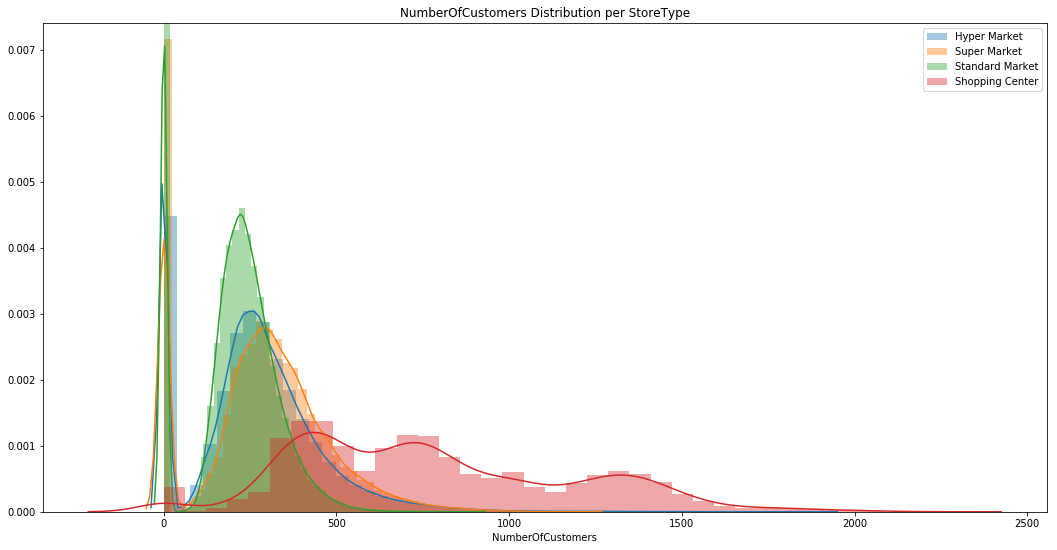

In [14]:
title = target + " Distribution per StoreType"
sb.distplot(a=df[df["StoreType_Hyper Market"] == 1][target], label="Hyper Market").set_title(title)
sb.distplot(a=df[df["StoreType_Super Market"] == 1][target], label="Super Market").set_title(title)
sb.distplot(a=df[df["StoreType_Standard Market"] == 1][target], label="Standard Market").set_title(title)
sb.distplot(a=df[df["StoreType_Shopping Center"] == 1][target], label="Shopping Center").set_title(title)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18, 9)

The following 4 graphs show how promotions affect the NumberOfCustomers distribution each store type. It appears that promotions benefit all types except Shopping Centers.

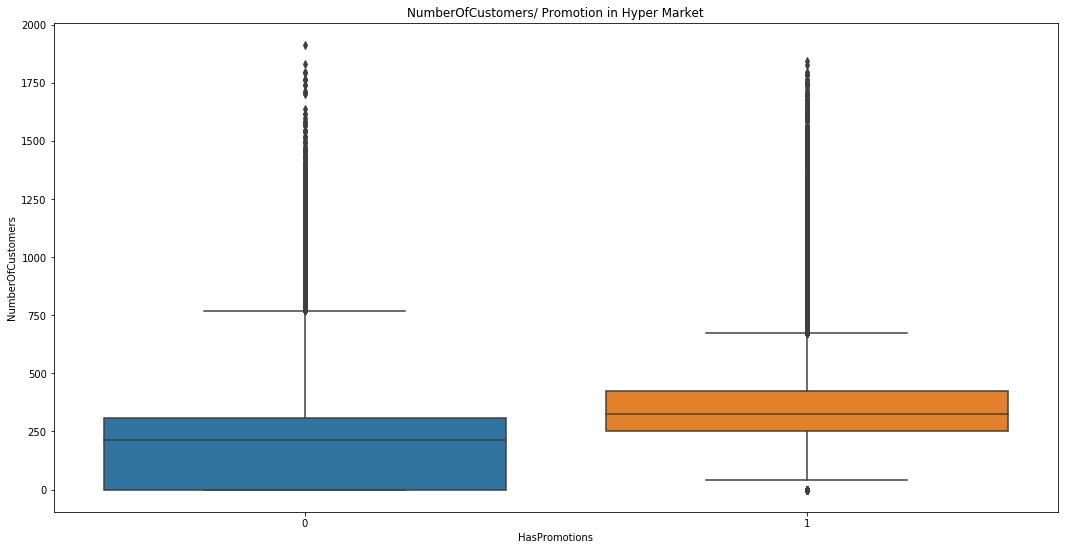

In [22]:
title = target + "/ Promotion"
sb.boxplot(x="HasPromotions", y=target, data=df[df["StoreType_Hyper Market"] == 1]).set_title(title + " in Hyper Market")
fig = plt.gcf()
fig.set_size_inches(18, 9)

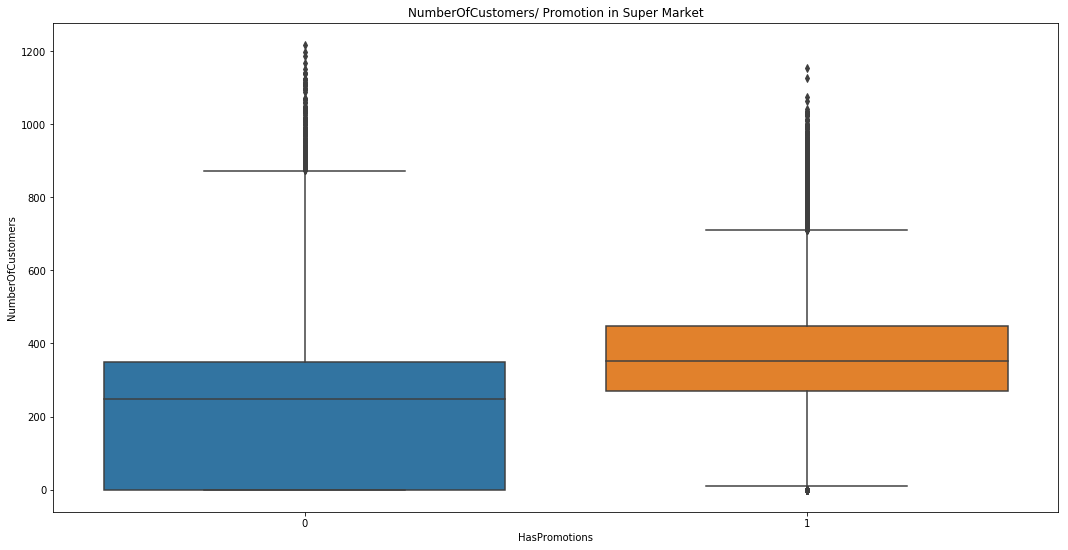

In [19]:
sb.boxplot(x="HasPromotions", y=target, data=df[df["StoreType_Super Market"] == 1]).set_title(title + " in Super Market")
fig = plt.gcf()
fig.set_size_inches(18, 9)

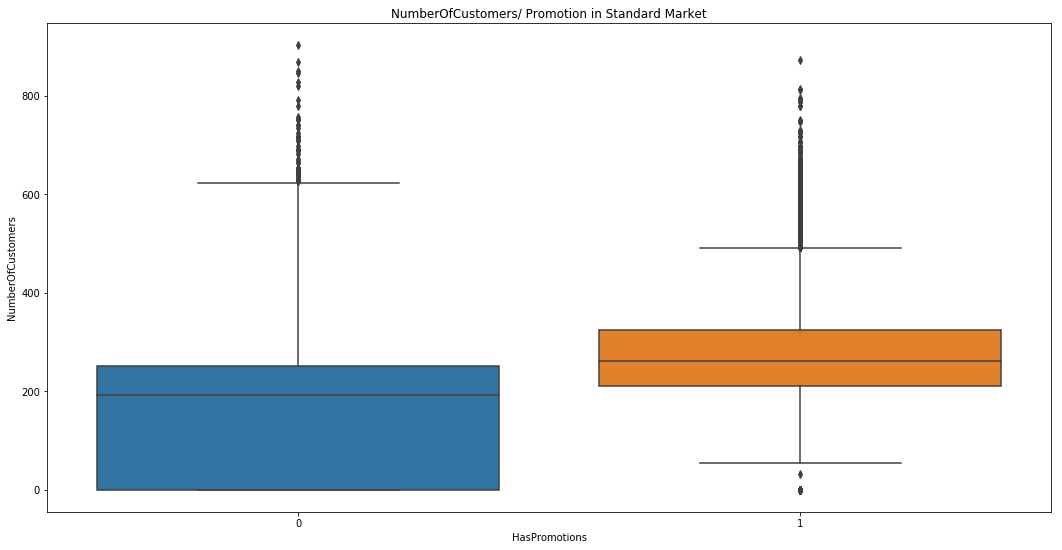

In [20]:
sb.boxplot(x="HasPromotions", y=target, data=df[df["StoreType_Standard Market"] == 1]).set_title(title + " in Standard Market")
fig = plt.gcf()
fig.set_size_inches(18, 9)

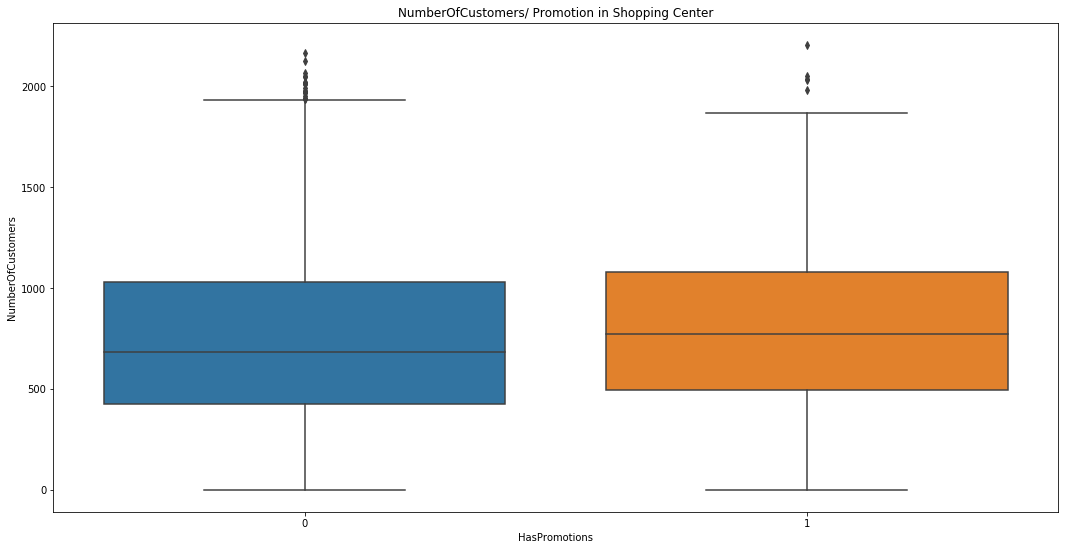

In [21]:
sb.boxplot(x="HasPromotions", y=target, data=df[df["StoreType_Shopping Center"] == 1]).set_title(title + " in Shopping Center")
fig = plt.gcf()
fig.set_size_inches(18, 9)